In [9]:
%reload_ext autoreload

import reservoirpy as rpy
rpy.verbosity(0)  # 詳細なログは不要
rpy.set_seed(42)  # 再現性を確保

from CustomReservoir import CustomReservoir
from NeuronModel import LIFNeuronModel
import numpy as np

# LIFニューロンモデルを作成
lif_model = LIFNeuronModel(time_constant=0.01, threshold=0.5, reset_potential=0.0)

# カスタムリザバーを作成
reservoir = CustomReservoir(
    units=100,  # ニューロン数
    lr=0.5,
    sr=0.9,
    neuron_model=lif_model,  # LIFニューロンモデル
    # fb_connectivity=0.0 # フィードバック結合なし
)

# 入力データ
second = 5
X = np.sin(np.linspace(0, second*2*np.pi, second*100)).reshape(-1, 1)

spike = np.empty((len(X), reservoir.output_dim))
membrane_potentials = np.empty((len(X), reservoir.units))
for i in range(len(X)):
    spike[i] = reservoir(X[i].reshape(1, -1))
    membrane_potentials[i] = reservoir.membrane_potentials.flatten()

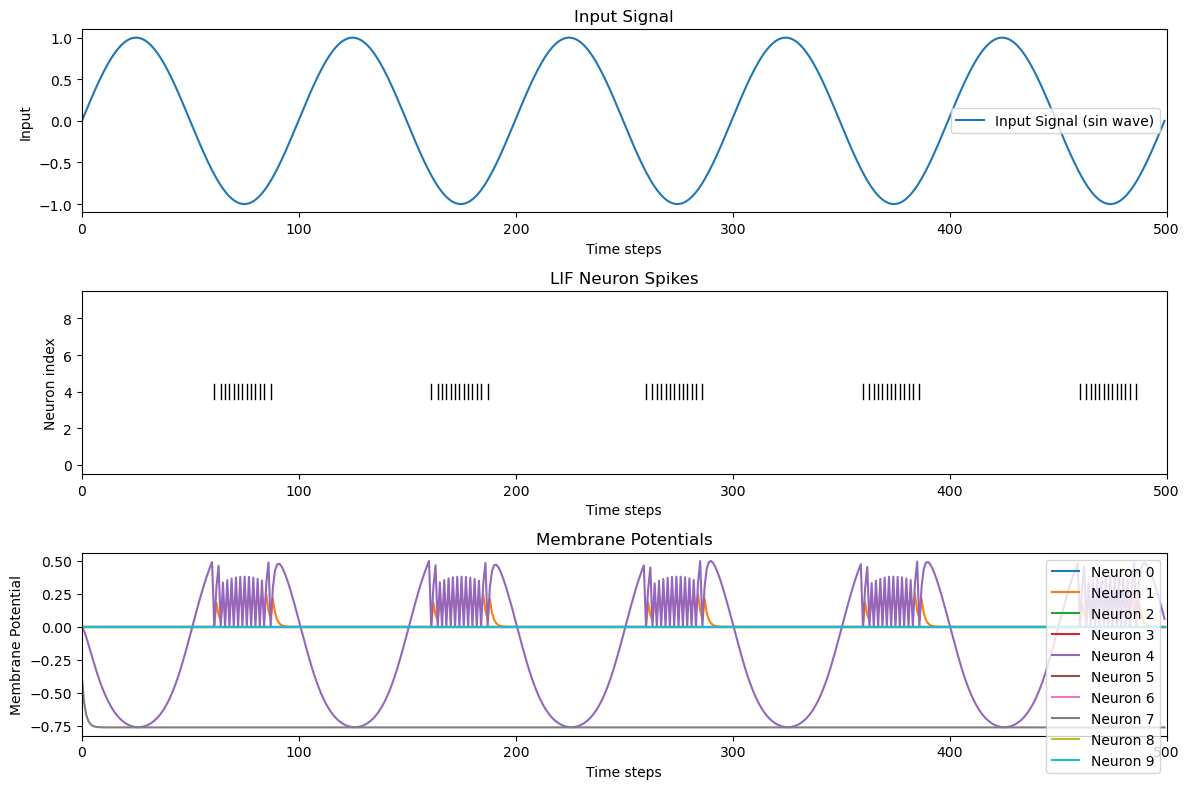

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# 入力データのプロット
plt.subplot(3, 1, 1)
plt.plot(X, label="Input Signal (sin wave)")
plt.title("Input Signal")
plt.xlabel("Time steps")
plt.xlim(0, len(X))
plt.ylabel("Input")
plt.legend()


# スパイクデータのプロット
plt.subplot(3, 1, 2)
plt.title("LIF Neuron Spikes")
for neuron_idx in range(spike.shape[1]):
    for t, spike_value in enumerate(spike[:, neuron_idx]):
        if spike_value > 0:
            plt.plot([t, t], [neuron_idx - 0.4, neuron_idx + 0.4], color='k', linestyle='-', linewidth=1)  # 発火したタイムステップに黒い縦線を表示

plt.xlabel("Time steps")
plt.ylabel("Neuron index")
plt.xlim(0, len(X))
plt.ylim(-0.5, spike.shape[1] - 0.5)

# 膜電位のプロット
plt.subplot(3, 1, 3)
plt.title("Membrane Potentials")
for neuron_idx in range(membrane_potentials.shape[1]):
    plt.plot(membrane_potentials[:, neuron_idx], label=f"Neuron {neuron_idx}")

plt.xlabel("Time steps")
plt.xlim(0, len(X))
plt.ylabel("Membrane Potential")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()